In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
zara_reviews = pd.read_csv('F:/Meta/Web/zara_reviews.csv')

In [2]:
### Data Cleaning
# convert the date column to datetime format
zara_reviews['date'] = pd.to_datetime(zara_reviews['date'])
# create a new column for the month
zara_reviews['month'] = zara_reviews['date'].dt.month
# create a new column for the year
zara_reviews['year'] = zara_reviews['date'].dt.year
# create a new column for the month and year
zara_reviews['month_year'] = zara_reviews['date'].dt.to_period('M')
zara_reviews.head()

# truncate the ' ' space at the beginning and the end of the string for status, title, position, location, pros, cons
zara_reviews['status'] = zara_reviews['status'].str.strip()
zara_reviews['title'] = zara_reviews['title'].str.strip()
zara_reviews['position'] = zara_reviews['position'].str.strip()
zara_reviews['location'] = zara_reviews['location'].str.strip()
zara_reviews['pros'] = zara_reviews['pros'].str.strip()
zara_reviews['cons'] = zara_reviews['cons'].str.strip()

# replace field that's entirely space (or empty) with NaN
zara_reviews = zara_reviews.replace(r'^\s*$', np.nan, regex=True)
# convert the nan values of position to 'unknown position'
zara_reviews['position'] = zara_reviews['position'].fillna('unknown position')

zara_reviews.head()

,overall_rates,status,title,date,position,location,pros,cons,month,year,month_year
0,5,Former Employee,Retail assistant review,2023-05-08,Retail Assistant,None,Was fun I enjoyed working there.,Rude customers during the sales,5,2023,2023-05
1,2,"Current Employee, more than 3 years",Avoid!!,2023-05-23,Sales Associate,"Manchester City Centre, England",1. Making different people 2. Potential for ...,1. Overworking yourself 2. Long hours 3. Manag...,5,2023,2023-05
2,3,Former Employee,Not the worst but not the best either,2023-05-22,Retail Sales Assistant,None,Not bad salary Not too stressful,Uniform Enviornment Staff and managers not ver...,5,2023,2023-05
3,3,Former Employee,Experience at Zara,2023-01-28,Sales Assistant,None,I was able to broaden my skills whilst working...,I feel that there were a handful of employees ...,1,2023,2023-01
4,3,Former Employee,law salaries,2023-05-26,Sales Associate,"Reading, England","career growth, good team, good manager",always very busy and not enough staff,5,2023,2023-05


In [3]:
# get unique position
zara_reviews['position'].unique()
# filter where statrs with 'Sale'
print(zara_reviews[zara_reviews['position'].str.startswith('Sale')].position.unique())
# filter where contains 'Sale'
print(zara_reviews[zara_reviews['position'].str.contains('Retail|retail')].position.unique())
# filter where contains 'cash' or 'Cash'
print(zara_reviews[zara_reviews['position'].str.contains('cash|Cash')].position.unique())
# filter where contains 'part' or 'Part'
print(zara_reviews[zara_reviews['position'].str.contains('part|Part')].position.unique())


['Sales Associate' 'Sales Assistant' 'Sales Associate/Cashier' 'Sales'
 'Sale Assistant' 'Sales Assitant' 'Sales Representative'
 'Sales Assitstant' 'Sales Advisor' 'Sales and Marketing Manager'
 'Sale Associate' 'Sales Assosiates' 'Sales Assistance'
 'Sales Assistant/Cashier' 'Sales Assistant, Visual Merchandiser'
 'Sales Assistant (Cashier)' 'Sales & Stockroom Assistant' 'Sales Team']
['Retail Assistant' 'Retail Sales Assistant' 'Retail Sales Associate'
 'Retail Sales Assistant (Part' 'Retailer' 'Retail Assiant' 'Retail'
 'Retail Manager' 'Retail Sales Consultant']
['Sales Associate/Cashier' 'Cashier' 'Part Time Cashier'
 'Cashier/Sales Associate' 'Head Cashier' 'Front End Cashier' 'Cashiers'
 'Senior Cashier' 'Sales Assistant/Cashier' 'Cashier/Sales Assistant'
 'Sales Assistant (Cashier)' 'Responsible Cashier' 'Cashier/Floor Sales']
['Retail Sales Assistant (Part' 'Part Time Cashier' 'Department Manager'
 'Operations Department Manager' 'Part Time Sales Assistant']


In [4]:
duplicated_sales_position = ['Sales Associate','Sales Assistant','Sale Assistant','Sales Assitant','Sales Assitstant','Sale Associate','Sales Assosiates','Sales Assistance']
# replace the above positions with 'Sales Associate'
zara_reviews['position'] = zara_reviews['position'].replace(duplicated_sales_position,'Sales Associate')

duplicated_cashier_position = ['Sales Associate/Cashier', 'Cashier', 'Cashier/Sales Associate', 'Cashiers', 'Sales Assistant/Cashier', 'Cashier/Sales Assistant', 'Sales Assistant (Cashier)', 'Cashier/Floor Sales']
# replace the above positions with 'Cashier'
zara_reviews['position'] = zara_reviews['position'].replace(duplicated_cashier_position,'Cashier')

duplicated_retail_position = ['Retail Assistant', 'Retail Sales Assistant', 'Retail Sales Associate', 'Retail Sales Consultant']
# replace the above positions with 'Retail Sales Associate'
zara_reviews['position'] = zara_reviews['position'].replace(duplicated_retail_position,'Retail Sales Associate')




In [5]:
# get unique position by counts in descending order for the top 10
zara_reviews['position'].value_counts().head(10)


Sales Associate           421
Cashier                   115
Anonymous Employee         87
Retail Sales Associate     61
Visual Merchandiser        16
Commercial                 15
Sales                      10
unknown position           10
Shop Assistant              9
Manager                     9
Name: position, dtype: int64

In [6]:
# create a new dataframe for overall rates and month_year
overall_rates_monthly = zara_reviews[['overall_rates','month_year']]
# convert the overall rates column to numeric
overall_rates_monthly['overall_rates'] = pd.to_numeric(overall_rates_monthly['overall_rates'])
# convert month_year to string
overall_rates_monthly['month_year'] = overall_rates_monthly['month_year'].astype(str)
# order the month_year column by ascending order
overall_rates_monthly = overall_rates_monthly.sort_values(by='month_year', ascending=True)
# drop rows before jan 2019
overall_rates_monthly = overall_rates_monthly[overall_rates_monthly['month_year']>'2018-12']

C:\Users\sunwe\AppData\Local\Temp\ipykernel_58440\1543630649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_rates_monthly['overall_rates'] = pd.to_numeric(overall_rates_monthly['overall_rates'])
C:\Users\sunwe\AppData\Local\Temp\ipykernel_58440\1543630649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_rates_monthly['month_year'] = overall_rates_monthly['month_year'].astype(str)


Text(0, 0.5, 'Overall ratings')

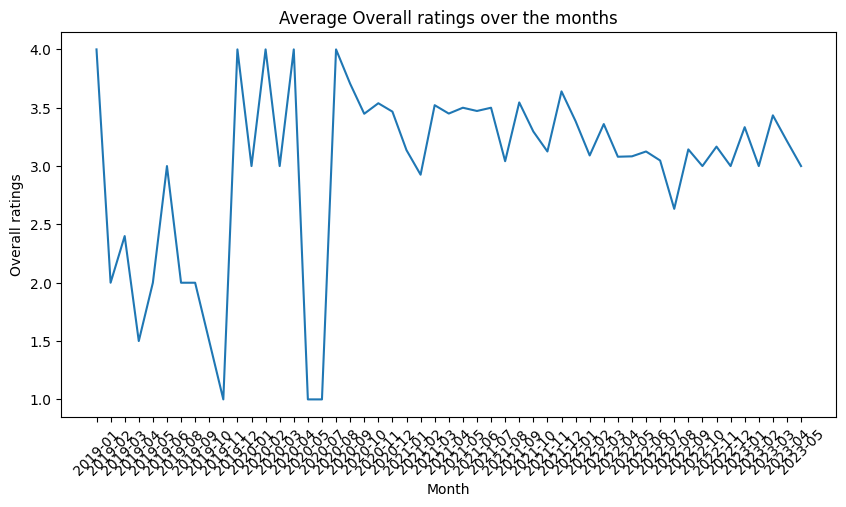

In [7]:

# Lineplot of overall ratings over the months
fig,ax = plt.subplots(figsize=(10,5))
x = overall_rates_monthly['month_year'].unique()
y = overall_rates_monthly.groupby('month_year')['overall_rates'].mean()
ax.plot(x,y)
plt.xticks(rotation=45)
ax.set_title('Average Overall ratings over the months')
ax.set_xlabel('Month')
ax.set_ylabel('Overall ratings')


In [8]:
# calculate the average overall ratings between 2020-05 and 2023-05
avg_rates_stable = overall_rates_monthly[(overall_rates_monthly['month_year']>'2020-05')&(overall_rates_monthly['month_year']<'2023-05')]['overall_rates'].mean()
print('The average overall ratings between 2020-05 and 2023-05 is '+str(round(avg_rates_stable,2)))

The average overall ratings between 2020-05 and 2023-05 is 3.26


C:\Users\sunwe\AppData\Local\Temp\ipykernel_58440\1528088099.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_positions['avg_rates'][i] = zara_reviews[zara_reviews['position']==top10_positions['position'][i]]['overall_rates'].mean()


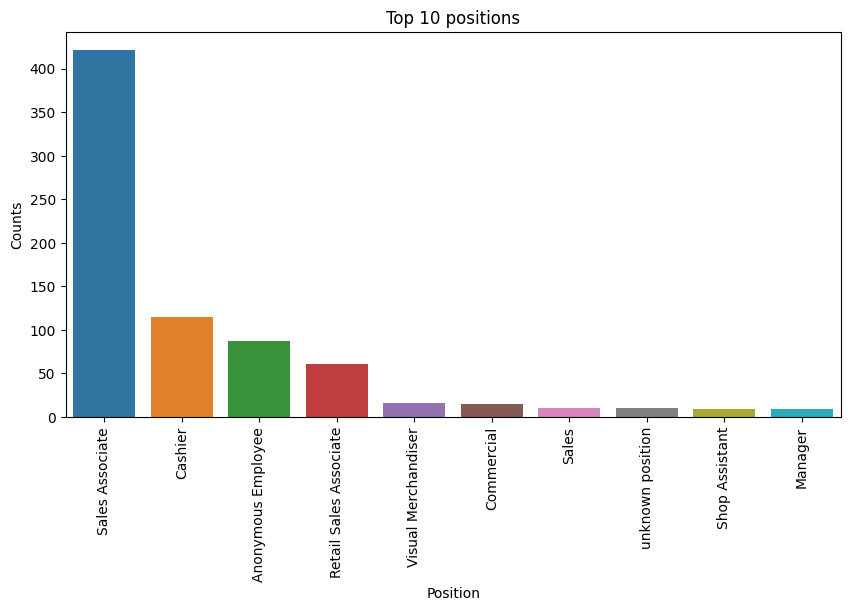

In [9]:
# get positions and their counts
positions = zara_reviews['position'].value_counts()
# get the top 10 positions
top10_positions = positions[:10]
top10_positions = pd.DataFrame(top10_positions)
top10_positions = top10_positions.reset_index()
top10_positions.columns = ['position','counts']
# create a barplot for top 10 positions
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='position',y='counts',data=top10_positions,ax=ax)
plt.xticks(rotation=90)
ax.set_title('Top 10 positions')
ax.set_xlabel('Position')
ax.set_ylabel('Counts')

top10_positions['avg_rates'] = 0
# calculate the average overall ratings for each position
for i in range(len(top10_positions)):
    top10_positions['avg_rates'][i] = zara_reviews[zara_reviews['position']==top10_positions['position'][i]]['overall_rates'].mean()
top10_positions = top10_positions.sort_values(by='avg_rates',ascending=False)

Text(0, 0.5, 'Position')

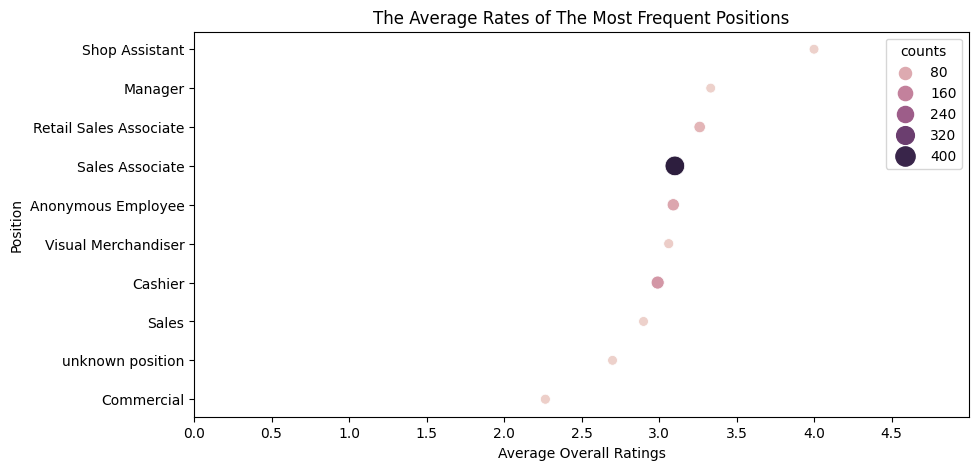

In [10]:
# create a scatterplot to combine the counts and average overall ratings and position
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='avg_rates',y='position',data=top10_positions,size='counts',sizes=(50,200),hue='counts',ax=ax)
# the range of the x axis is from 0.0 to 5.0
plt.xlim(0.0,5.0)
plt.xticks(np.arange(0.0,5.0,0.5))
ax.set_title('The Average Rates of The Most Frequent Positions')
ax.set_xlabel('Average Overall Ratings')
ax.set_ylabel('Position')



In [11]:
# the sum percentage of the Sales Associate, cashier, retail sales associate and visual merchandiser of all the positions
print('The sum percentage of the Sales Associate, cashier, retail sales associate and visual merchandiser of all the positions is '+str(round(top10_positions[top10_positions['position'].isin(['Sales Associate','Cashier','Retail Sales Associate','Visual Merchandiser'])]['counts'].sum()/top10_positions['counts'].sum()*100,2))+'%')




The sum percentage of the Sales Associate, cashier, retail sales associate and visual merchandiser of all the positions is 81.41%


C:\Users\sunwe\AppData\Local\Temp\ipykernel_58440\4046017369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pros_cons['position'] = zara_reviews['position']
C:\Users\sunwe\AppData\Local\Temp\ipykernel_58440\4046017369.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pros_cons_avg = pros_cons.groupby('position').mean()


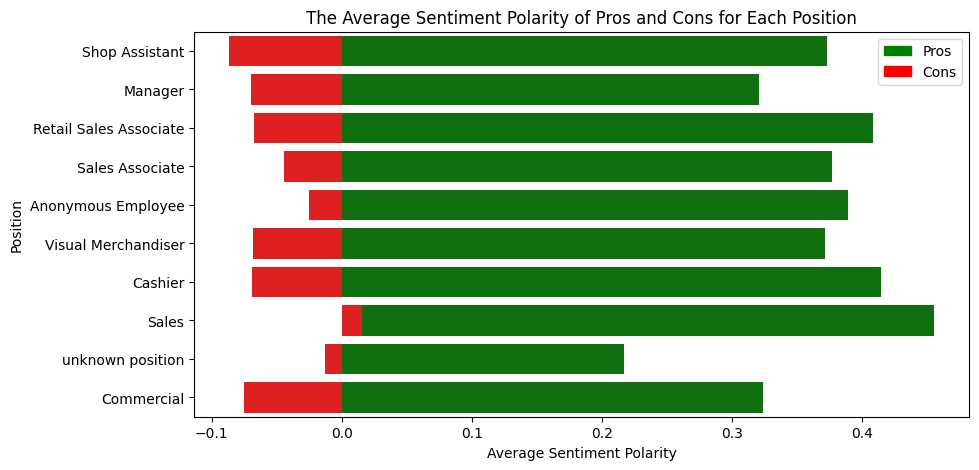

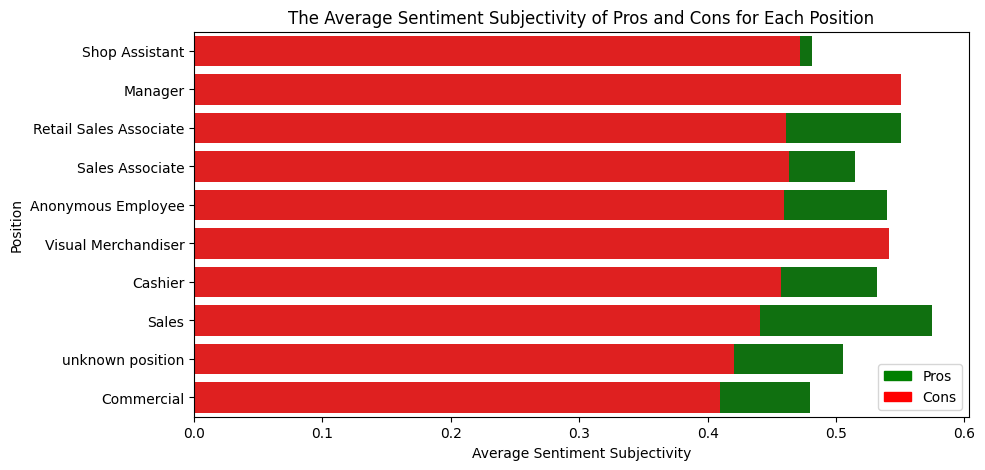

In [12]:
from textblob import TextBlob
import matplotlib.patches as mpatches

# the Sentiment Polarity & Subjectivity of pros and cons
pros_cons = zara_reviews[['pros','cons']]
pros_cons['position'] = zara_reviews['position']
# only keep the rows where positions are in top10_positions
pros_cons = pros_cons[pros_cons['position'].isin(top10_positions['position'])]
# convert the pros and cons to string
pros_cons['pros'] = pros_cons['pros'].astype(str)
pros_cons['cons'] = pros_cons['cons'].astype(str)
# calculate the sentiment polarity and subjectivity of pros and cons
pros_cons['pros_polarity'] = pros_cons['pros'].apply(lambda x: TextBlob(x).sentiment.polarity)
pros_cons['pros_subjectivity'] = pros_cons['pros'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
pros_cons['cons_polarity'] = pros_cons['cons'].apply(lambda x: TextBlob(x).sentiment.polarity)
pros_cons['cons_subjectivity'] = pros_cons['cons'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
# calculate the average sentiment polarity and subjectivity of pros and cons for each position
pros_cons_avg = pros_cons.groupby('position').mean()
pros_cons_avg = pros_cons_avg.reset_index()
# merge the top10_positions and pros_cons_avg
top10_positions = pd.merge(top10_positions,pros_cons_avg,on='position',how='left')
# sort the dataframe by avg_rates in descending order
top10_positions = top10_positions.sort_values(by='avg_rates',ascending=False)

# the datatype of pros_polarity and cons_polarity is object, convert it to numeric
top10_positions['pros_polarity'] = pd.to_numeric(top10_positions['pros_polarity'])
top10_positions['cons_polarity'] = pd.to_numeric(top10_positions['cons_polarity'])
# the datatype of pros_subjectivity and cons_subjectivity is object, convert it to numeric
top10_positions['pros_subjectivity'] = pd.to_numeric(top10_positions['pros_subjectivity'])
top10_positions['cons_subjectivity'] = pd.to_numeric(top10_positions['cons_subjectivity'])


# create a barplot to show the average sentiment polarity of pros and cons for each position
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='pros_polarity',y='position',data=top10_positions,ax=ax,color='green')
sns.barplot(x='cons_polarity',y='position',data=top10_positions,ax=ax,color='red')
ax.set_title('The Average Sentiment Polarity of Pros and Cons for Each Position')
ax.set_xlabel('Average Sentiment Polarity')
ax.set_ylabel('Position')
# add a legend with green and red
ax.legend(handles=[mpatches.Patch(color='green',label='Pros'),mpatches.Patch(color='red',label='Cons')])

# create a barplot to show the average sentiment subjectivity of pros and cons for each position
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='pros_subjectivity',y='position',data=top10_positions,ax=ax,color='green')
sns.barplot(x='cons_subjectivity',y='position',data=top10_positions,ax=ax,color='red')
ax.set_title('The Average Sentiment Subjectivity of Pros and Cons for Each Position')
ax.set_xlabel('Average Sentiment Subjectivity')
ax.set_ylabel('Position')
# add a legend with green and red
ax.legend(handles=[mpatches.Patch(color='green',label='Pros'),mpatches.Patch(color='red',label='Cons')])





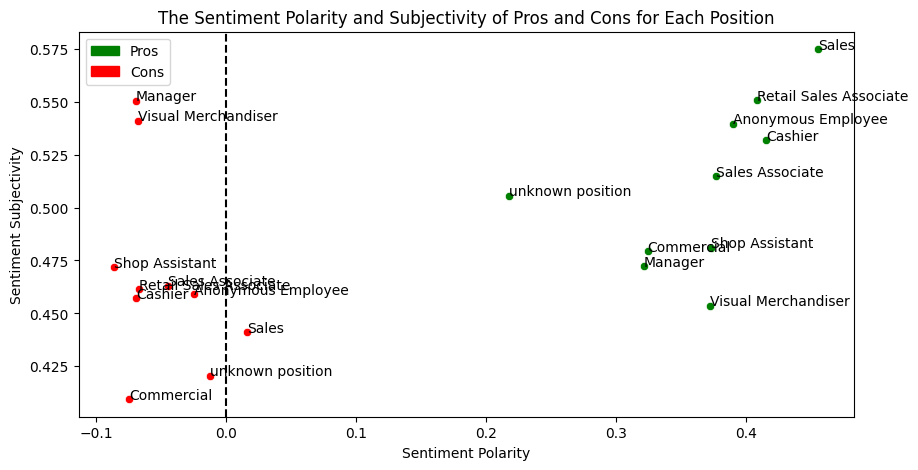

In [13]:
# plot the polarity and subjectivity of the most frequent 10 job titles
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='pros_polarity',y='pros_subjectivity',data=top10_positions,ax=ax,color='green')
sns.scatterplot(x='cons_polarity',y='cons_subjectivity',data=top10_positions,ax=ax,color='red')
ax.set_title('The Sentiment Polarity and Subjectivity of Pros and Cons for Each Position')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Sentiment Subjectivity')
# add a legend with green and red
ax.legend(handles=[mpatches.Patch(color='green',label='Pros'),mpatches.Patch(color='red',label='Cons')])
# add a line to separate the positive and negative sentiment polarity
ax.axvline(x=0,color='black',linestyle='--')
# add each position name to the plot
for i in range(len(top10_positions)):
    ax.annotate(top10_positions['position'][i],(top10_positions['pros_polarity'][i],top10_positions['pros_subjectivity'][i]))
    ax.annotate(top10_positions['position'][i],(top10_positions['cons_polarity'][i],top10_positions['cons_subjectivity'][i]))




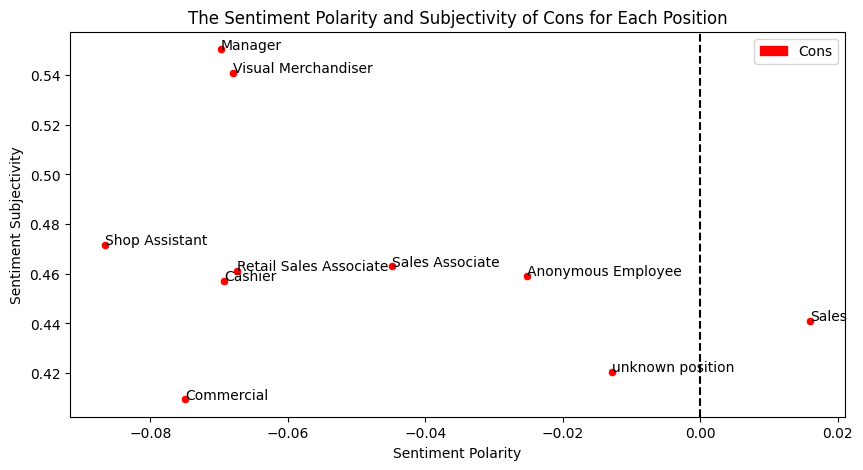

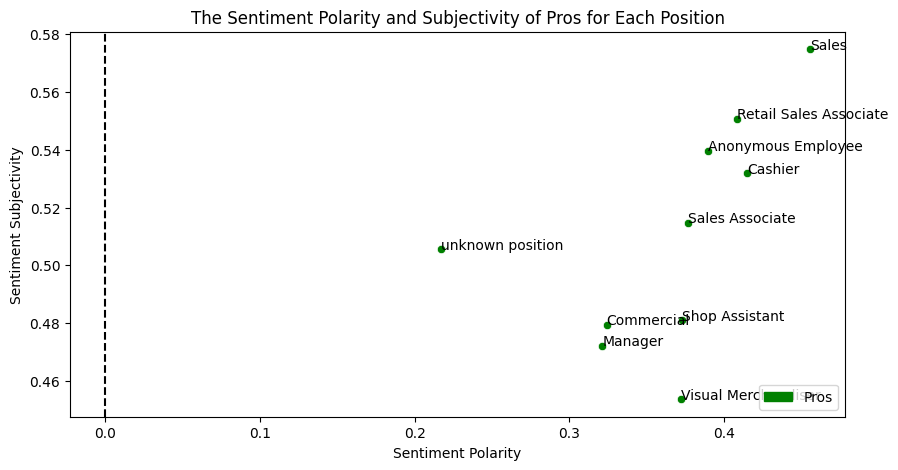

In [14]:
# plot the polarity and subjectivity of the most frequent 10 job titles
# plot only cons sentiment polarity and subjectivity
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='cons_polarity',y='cons_subjectivity',data=top10_positions,ax=ax,color='red')
ax.set_title('The Sentiment Polarity and Subjectivity of Cons for Each Position')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Sentiment Subjectivity')
ax.legend(handles=[mpatches.Patch(color='red',label='Cons')])
ax.axvline(x=0,color='black',linestyle='--')
# add each position name to the plot
for i in range(len(top10_positions)):
    ax.annotate(top10_positions['position'][i],(top10_positions['cons_polarity'][i],top10_positions['cons_subjectivity'][i]))

# plot only pros sentiment polarity and subjectivity
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='pros_polarity',y='pros_subjectivity',data=top10_positions,ax=ax,color='green')
ax.set_title('The Sentiment Polarity and Subjectivity of Pros for Each Position')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Sentiment Subjectivity')
ax.legend(handles=[mpatches.Patch(color='green',label='Pros')])
ax.axvline(x=0,color='black',linestyle='--')
for i in range(len(top10_positions)):
    ax.annotate(top10_positions['position'][i],(top10_positions['pros_polarity'][i],top10_positions['pros_subjectivity'][i]))
    
    

In [15]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import spacy
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re
from os import path
from PIL import Image
import plotly
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# The Most Common Unigram Words Displayed in Table
# create a function to get the most common unigram words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) # sum the words
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()] # create a list of tuples
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True) # sort the list of tuples in descending order
    return words_freq[:n] # return the top n words

# create a function to display the most common unigram words in a table
def display_top_n_words(corpus,n=None):
    top_words = get_top_n_words(corpus,n)
    top_df = pd.DataFrame(top_words)
    top_df.columns = ['Word','Frequency']
    return top_df

In [17]:
# display the most common unigram words in pros of zara_reviews
display_top_n_words(zara_reviews['pros'],20)

,Word,Frequency
0,good,437
1,discount,276
2,work,187
3,pay,161
4,nice,146
5,staff,130
6,great,124
7,people,121
8,team,112
9,environment,98


In [18]:
# display the most common unigram words in cons of zara_reviews
display_top_n_words(zara_reviews['cons'],20)

,Word,Frequency
0,work,266
1,management,212
2,managers,208
3,hours,207
4,staff,158
5,time,143
6,long,123
7,people,118
8,rude,117
9,working,117


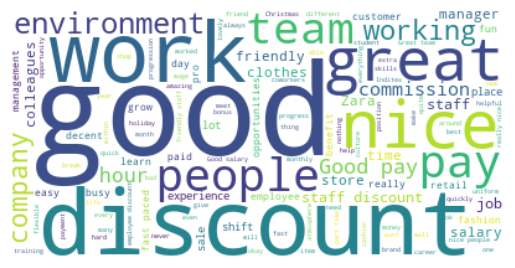

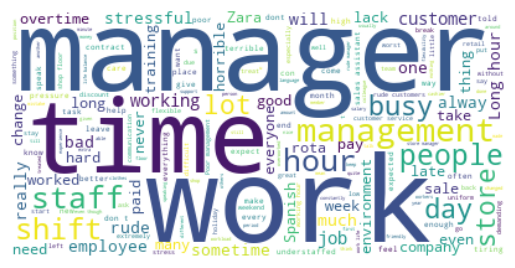

In [19]:
# Visualize The Most Common Unigram Words
# define a function to plot wordcloud
def plot_wordcloud(text):
    # create a wordcloud object
    wordcloud = WordCloud(background_color='white',max_words=1000,stopwords=STOPWORDS,contour_width=3,contour_color='steelblue')
    # generate a wordcloud
    wordcloud.generate(text)
    # visualize the wordcloud
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

# plot the wordcloud of pros
plot_wordcloud(' '.join(zara_reviews['pros']))

# plot the wordcloud of cons
plot_wordcloud(' '.join(zara_reviews['cons']))